In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat

In [3]:
pharyngitis = pd.read_csv("/content/pharyngitis.csv")

In [4]:

pharyngitis_new=pharyngitis.drop(["number"],axis=1)
col = pharyngitis_new.shape[1]
print(col)
#pharyngitis_new
pharyngitis_new[15:25]

19


,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
15,12.9,1,1.0,0.0,0.0,0.0,1.0,37.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16,4.9,0,1.0,1.0,0.0,0.0,0.0,39.4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,3.9,1,1.0,1.0,0.0,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
18,4.2,0,0.0,2.0,0.0,0.0,0.0,39.8,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
19,3.3,0,1.0,2.0,0.0,0.0,0.0,39.0,1.0,0.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0
20,4.2,0,1.0,3.0,0.0,0.0,0.0,39.8,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
21,4.5,0,1.0,0.0,0.0,0.0,0.0,38.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
22,9.0,1,1.0,2.0,0.0,0.0,0.0,37.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
23,8.5,0,0.0,2.0,0.0,0.0,0.0,38.2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
24,5.4,1,1.0,2.0,0.0,0.0,0.0,39.5,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


0    371
1    305
Name: radt, dtype: int64
            number       age_y        radt        pain  swollenadp  \
count   676.000000  676.000000  676.000000  644.000000  672.000000   
mean   2586.340237    6.074260    0.451183    0.841615    0.989583   
std     431.962484    2.493206    0.497980    0.365386    0.968142   
min    2000.000000    3.000000    0.000000    0.000000    0.000000   
25%    2216.750000    4.200000    0.000000    1.000000    0.000000   
50%    2460.500000    5.400000    0.000000    1.000000    1.000000   
75%    3079.250000    7.200000    1.000000    1.000000    2.000000   
max    3289.000000   14.300000    1.000000    1.000000    3.000000   

           tender  tonsillarswelling     exudate  temperature      sudden  \
count  648.000000         658.000000  666.000000   673.000000  669.000000   
mean     0.202160           0.724924    0.216216    38.739970    0.802691   
std      0.401922           0.446892    0.411973     0.838184    0.398266   
min      0.000000 

,age_y,radt,pain,swollenadp,tender,tonsillarswelling,exudate,temperature,sudden,cough,rhinorrhea,conjunctivitis,headache,erythema,petechiae,abdopain,diarrhea,nauseavomit,scarlet
age_y,1.000000,0.053040,0.172687,-0.066948,0.111555,-0.028780,-0.052526,-0.183322,-0.029488,-0.104868,-0.075037,-0.015546,0.139277,0.043888,-0.086960,-0.033491,-0.003373,0.030112,-0.156559
radt,0.053040,1.000000,0.058731,0.148881,0.161942,0.054509,-0.070755,-0.075876,0.049720,-0.143711,-0.079154,-0.046575,0.003736,0.086701,0.280827,-0.023927,-0.079982,0.048887,0.274266
pain,0.172687,0.058731,1.000000,-0.032768,0.095537,0.003130,-0.143276,-0.162549,0.047557,-0.025228,-0.030716,-0.008344,-0.061812,-0.071029,0.021021,-0.032934,-0.028034,-0.017598,-0.140268
swollenadp,-0.066948,0.148881,-0.032768,1.000000,0.482841,-0.050747,-0.003951,0.127872,0.108569,-0.110099,-0.056294,0.021009,-0.013453,0.076058,0.160881,0.029722,-0.061380,0.015160,0.063609
tender,0.111555,0.161942,0.095537,0.482841,1.000000,0.018044,0.044489,0.075157,-0.006739,-0.130127,-0.073020,0.003080,0.066334,-0.009430,-0.082249,0.034241,-0.056830,0.079018,-0.032822
tonsillarswelling,-0.028780,0.054509,0.003130,-0.050747,0.018044,1.000000,0.110855,0.063894,0.074387,-0.044345,0.028157,-0.002546,-0.053953,0.093672,-0.064479,0.005539,0.017971,-0.019218,0.017091
exudate,-0.052526,-0.070755,-0.143276,-0.003951,0.044489,0.110855,1.000000,0.166380,0.020036,-0.066898,-0.041115,-0.062594,-0.080565,-0.354619,-0.056680,0.016281,0.038096,0.072304,-0.031763
temperature,-0.183322,-0.075876,-0.162549,0.127872,0.075157,0.063894,0.166380,1.000000,0.191967,0.002313,0.006464,-0.016055,0.073087,-0.071288,0.075780,0.084988,0.016221,0.129765,-0.000732
sudden,-0.029488,0.049720,0.047557,0.108569,-0.006739,0.074387,0.020036,0.191967,1.000000,-0.071713,-0.089272,-0.051907,-0.032165,0.058608,0.194782,-0.002199,-0.088640,-0.002909,0.040592
cough,-0.104868,-0.143711,-0.025228,-0.110099,-0.130127,-0.044345,-0.066898,0.002313,-0.071713,1.000000,0.401916,0.101517,0.027487,0.037150,-0.126748,-0.042185,0.027511,0.043381,-0.032566


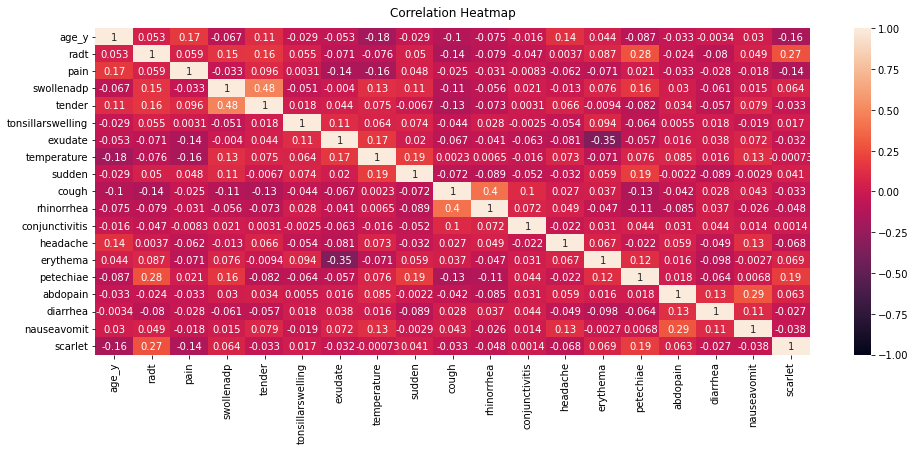

In [30]:

#eda
print(pharyngitis.radt.value_counts())
print(pharyngitis.describe())
print(pharyngitis.info())
print(pharyngitis.shape, pharyngitis.dropna().shape)
#to check the no. of null values in each column
print(pharyngitis.isnull().sum())
plt.figure(figsize=(16, 6))
max_correlation=sorted(set(pharyngitis_new.corr().to_numpy().flatten()), reverse=True)[1]
sns.heatmap(pharyngitis_new.corr(), annot=True,vmin=-1, vmax=1).set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
pharyngitis_new.corr()

In [6]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.metrics.pairwise import euclidean_distances

In [7]:
def cleanbinary(df,df_old):
  df_bin_col=df_old.columns[df_old.isin([0,1,1.0,0.0,np.nan]).all()]
  for col in df_bin_col:
    df[col] = [1 if x>0.5 else 0 for x in df.loc[:,col]]
    df[col]=df[col].astype('category',copy=False)
  return df

def norm_to_zero_one(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

df_bin_col=pharyngitis_new.columns[pharyngitis_new.isin([0,1,1.0,0.0,np.nan]).all()]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

def visualizedf(df1,df2):
  dist=[]
  binary_change=[]
  numerical_change=[]
  for col in df1.columns:
    if col in df_bin_col:
      dist.append(1-jaccard_score(df1[col], df2[col]))
      binary_change.append(1-jaccard_score(df1[col], df2[col]))
    else:
      dist.append(np.linalg.norm(df1[col]-df2[col]))
      numerical_change.append(np.linalg.norm(df1[col]-df2[col]))
  # plt.plot(df1.columns,dist)
  # plt.figure(figsize=(10, 20), dpi=200)
  plt.figure(figsize=(25, 6))
  plt.bar(df1.columns, dist, color ='maroon',width = 0.4,)
  addlabels(df1.columns, [round(num,3) for num in dist])
  plt.show()
  return [stat.mean(binary_change),stat.mean(numerical_change)]
      
    

In [9]:

#normalize
pharyngitis_new_normalized = norm_to_zero_one(pharyngitis_new)
#pharyngitis_new_normalized[15:25]

In [10]:

imputer1 = KNNImputer(
        missing_values=np.nan,
        n_neighbors=1,
        weights="uniform"
    )

imputer2 = KNNImputer(
        missing_values=np.nan,
        n_neighbors=5,
        weights="distance"
    )

imputer3 = IterativeImputer(
        missing_values=np.nan,
        random_state=0,
        n_nearest_features=3,
        max_iter=1,
        sample_posterior=True)




pharyngitis_cleaned_knn1 = pd.DataFrame(imputer1.fit_transform(pharyngitis_new), columns=pharyngitis_new.columns)
pharyngitis_cleaned_knn1_normalized = pd.DataFrame(imputer1.fit_transform(pharyngitis_new_normalized), columns=pharyngitis_new.columns)

pharyngitis_cleaned_knnm1 = pd.DataFrame(imputer2.fit_transform(pharyngitis_new), columns=pharyngitis_new.columns)
pharyngitis_cleaned_knnm1_normalized = pd.DataFrame(imputer2.fit_transform(pharyngitis_new_normalized), columns=pharyngitis_new.columns)

pharyngitis_cleaned_logreg_normalized=pd.DataFrame(imputer3.fit_transform(pharyngitis_new_normalized), columns=pharyngitis_new_normalized.columns)


#clean
pharyngitis_cleaned_knnm1 = cleanbinary(pharyngitis_cleaned_knnm1,pharyngitis_new)
pharyngitis_cleaned_logreg_normalized = cleanbinary(pharyngitis_cleaned_logreg_normalized,pharyngitis_new_normalized)

pharyngitis_cleaned_knn1_normalized = cleanbinary(pharyngitis_cleaned_knn1_normalized,pharyngitis_new_normalized)
pharyngitis_cleaned_knnm1_normalized = cleanbinary(pharyngitis_cleaned_knnm1_normalized,pharyngitis_new_normalized)


#round to 1
pharyngitis_cleaned_knn1=pharyngitis_cleaned_knn1.round(1)
pharyngitis_cleaned_knnm1=pharyngitis_cleaned_knnm1.round(1)

pharyngitis_cleaned_knn1_normalized=pharyngitis_cleaned_knn1_normalized.round(3)
pharyngitis_cleaned_knnm1_normalized=pharyngitis_cleaned_knnm1_normalized.round(3)

pharyngitis_cleaned_logreg_normalized=pharyngitis_cleaned_logreg_normalized.round(3)


#pharyngitis_cleaned_logreg_normalized[15:25]

#knn with k>1 and a threshold to convert to binary - done
#hotdeck and logistic regression
#Multiple imputation - https://jamescheshire.github.io/learningR/missing-data.html
#https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html?highlight=knn

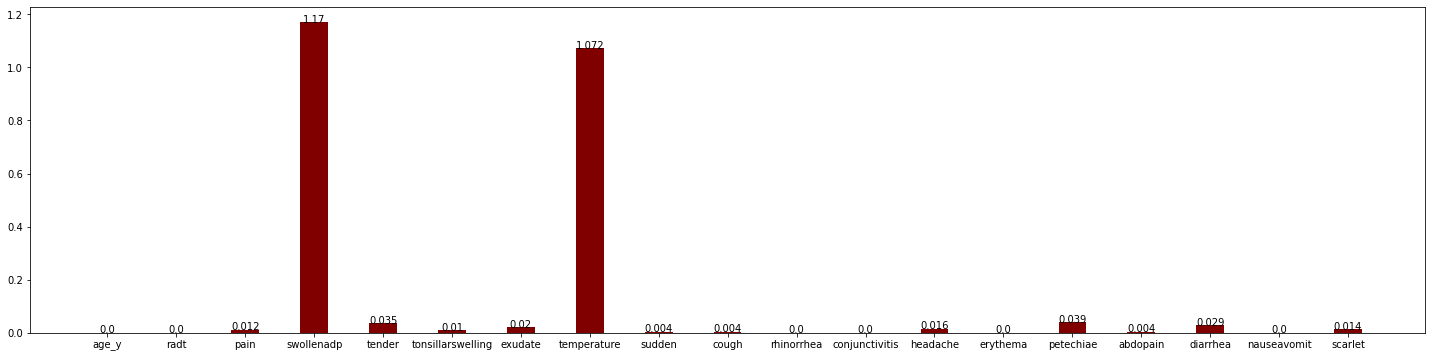

[0.011780034914439158, 0.7476168401827737]


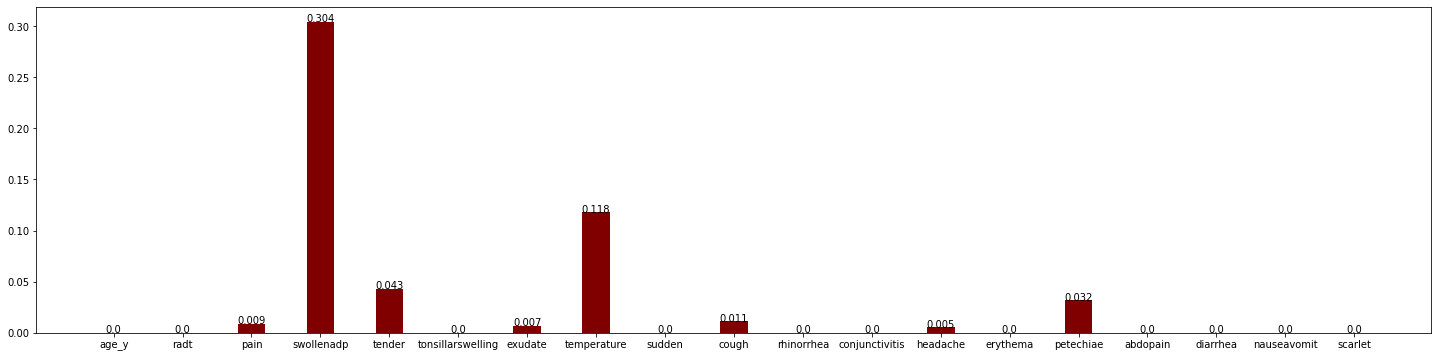

[0.0066830177289095224, 0.14066019641747446]


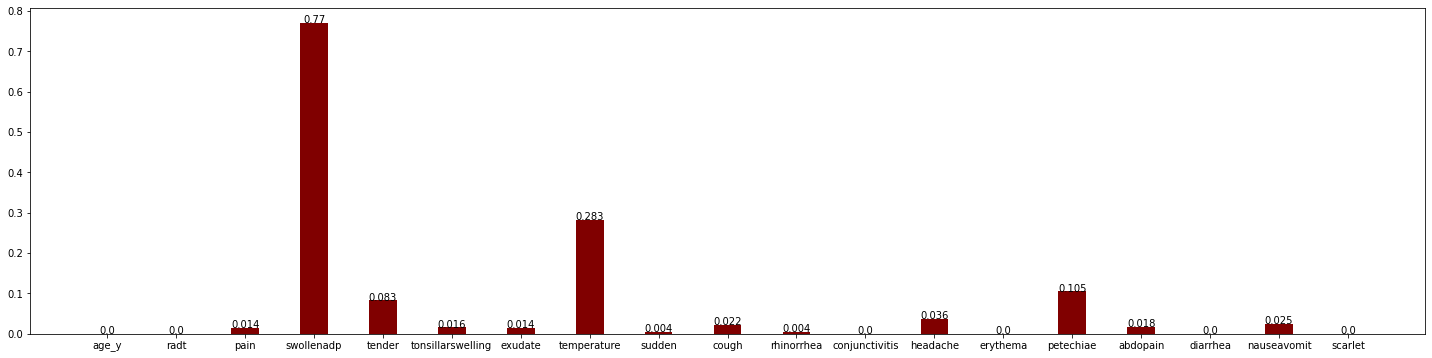

[0.021337115832255185, 0.35093615584982674]


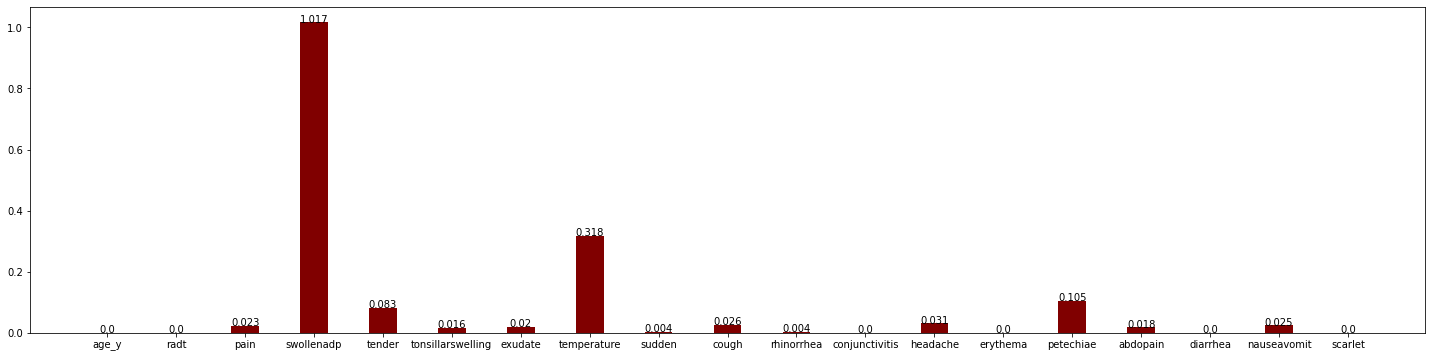

[0.022165341549573482, 0.44500067913647406]


In [ ]:
#dataset comparision
scores0=visualizedf(pharyngitis_cleaned_knnm1,pharyngitis_cleaned_knn1)
print(scores0)
scores1=visualizedf(pharyngitis_cleaned_knnm1_normalized,pharyngitis_cleaned_knn1_normalized)
print(scores1)
scores2=visualizedf(pharyngitis_cleaned_logreg_normalized, pharyngitis_cleaned_knnm1_normalized)
print(scores2)
scores3=visualizedf(pharyngitis_cleaned_logreg_normalized, pharyngitis_cleaned_knn1_normalized)
print(scores3)

In [ ]:
pharyngitis_cleaned_knnm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age_y              676 non-null    float64 
 1   radt               676 non-null    category
 2   pain               676 non-null    category
 3   swollenadp         676 non-null    float64 
 4   tender             676 non-null    category
 5   tonsillarswelling  676 non-null    category
 6   exudate            676 non-null    category
 7   temperature        676 non-null    float64 
 8   sudden             676 non-null    category
 9   cough              676 non-null    category
 10  rhinorrhea         676 non-null    category
 11  conjunctivitis     676 non-null    category
 12  headache           676 non-null    category
 13  erythema           676 non-null    category
 14  petechiae          676 non-null    category
 15  abdopain           676 non-null    category
 16  diarrhea

In [ ]:

pharyngitis_cleaned_knn1.to_csv("/content/pharyngitis_cleaned_knn1.csv", index=False)
pharyngitis_cleaned_knnm1.to_csv("/content/pharyngitis_cleaned_knnm1.csv", index=False)
# pharyngitis_cleaned_knnm1_normalized.to_csv("/content/pharyngitis_cleaned_knnm1_normalized.csv", index=False)
# pharyngitis_cleaned_knn1_normalized.to_csv("/content/pharyngitis_cleaned_knn1_normalized.csv", index=False)
# pharyngitis_cleaned_logreg_normalized.to_csv("/content/pharyngitis_cleaned_logreg_normalized.csv", index=False)

In [ ]:

#attribute selection
import math
from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

def compute_confusion_matrix(y, y_pred, print_ = False):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    tpr = tp / (tp + fn) if tp + fn > 0 else 0
    fpr = fp / (fp + tn) if fp + tn > 0 else 0
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0
    mcc =( (tp * tn) - (fp * fn)) / math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)) if math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)) > 0 else 0
    if print_:
        print("TP, FP, TN, FN, TPR, FPR, Precision, Recall, F-score, MCC, Accuracy")
        print("%d, %d, %d, %d, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f, %.3f" %
              (tp, fp, tn, fn, tpr, fpr, precision, recall, f, mcc, accuracy))
        print()
    return accuracy

def prepare_inputs(X_train):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	return pd.DataFrame(X_train_enc, columns=X_train.columns)

def recursive_elimination(df):
    def re(feature, X, y):
        nonlocal accuracy, features
        if len(feature) == 1: return
        temp = feature
        temp_acc = 0
        for f in range(len(feature)):
            fea = feature[:f] + feature[f+1:]
            X_train, X_test, y_train, y_test = train_test_split(X[fea], y, train_size=0.66, random_state=1)
            tree = DecisionTreeClassifier(random_state=1)
            tree.fit(X_train, y_train)
            y_pred = tree.predict(X_test)
            accr = compute_confusion_matrix(y_test, y_pred)
            if accuracy < accr:
                features = fea
                accuracy = accr

            if temp_acc < accr:
                temp_acc = accr
                temp = fea
        re(temp, X[temp], y)

    features = list(df.columns)
    features.remove("radt")
    accuracy = 0
    re(features, df.drop(['radt'], axis=1), df['radt'])
    print("Recursive Elimination Method: " + str(features))
    return features

def select_from_RF(df):
    model = RandomForestClassifier()
    fs = SelectFromModel(model)
    fs.fit(df.drop(["radt"], axis=1), df["radt"])

    features = list(df.drop(["radt"], axis=1).columns[fs.get_support()])
    print("Feature selections from random forest model: " + str(features))
    return features


np.random.seed(111)

def select_features(X_train, y_train, method, nf):
  fs = SelectKBest(score_func=method, k=nf)
  fs.fit(X_train, y_train)
  X_train_fs = fs.transform(X_train)
  return fs.get_feature_names_out()

def finalcol(cols):
	cols=np.append(cols,"radt")
	return cols 

X = prepare_inputs(pharyngitis_cleaned_knnm1.drop(["radt"],axis=1))
Y = pharyngitis_cleaned_knnm1["radt"]
cols_Varthreshold = VarianceThreshold(threshold=(.9 * (1 - .9))).fit(X).get_feature_names_out()
X = X[cols_Varthreshold]
print("Varaince:",cols_Varthreshold)
cols_chi2=select_features(X,Y,chi2,11)
cols_mic=select_features(X,Y,mutual_info_classif,11)
cols_ftest=select_features(X,Y,f_classif,11)

print("Chi-square:", cols_chi2)
print("Mutual info:",cols_mic)
print("ANOVA f-selection:",cols_ftest)
cols_re =recursive_elimination(pharyngitis_cleaned_knnm1)
cols_RF = select_from_RF(pharyngitis_cleaned_knnm1)

def createds(cols,df, filename):
  newds = df[finalcol(cols)]
  newds.to_csv(filename, index=False)

filenames=[x +"_"+ y+".csv" for x in ["phary_cl_knnm1" ] for y in ["chi2", "mic","ftest","re","RF"]]

ds = [pharyngitis_cleaned_knnm1]
fs_cols = [cols_chi2, cols_mic, cols_ftest, cols_re, cols_RF]

def createmultids(df, fs_cols):
  i=0
  for frame in df:
    for cols in fs_cols:
      createds(cols, frame, filenames[i])
      i=i+1

createmultids(ds,fs_cols)

# pharyngitis_cleaned_knnm1_chi2=pharyngitis_cleaned_knnm1[finalcol(cols_chi2)]
# pharyngitis_cleaned_knnm1_mic=pharyngitis_cleaned_knnm1[finalcol(cols_mic)]
# pharyngitis_cleaned_knnm1_ftest=pharyngitis_cleaned_knnm1[finalcol(cols_ftest)]
# pharyngitis_cleaned_knnm1_RE=pharyngitis_cleaned_knnm1[finalcol(cols_re)]
# pharyngitis_cleaned_knnm1_RF=pharyngitis_cleaned_knnm1[finalcol(cols_RF)]
# pharyngitis_cleaned_knnm1_chi2.to_csv("/content/pharyngitis_cleaned_knnm1_chi2.csv", index=False)
# pharyngitis_cleaned_knnm1_mic.to_csv("/content/pharyngitis_cleaned_knnm1_mic.csv", index=False)
# pharyngitis_cleaned_knnm1_ftest.to_csv("/content/pharyngitis_cleaned_knnm1_ftest.csv", index=False)
# pharyngitis_cleaned_knnm1_RE.to_csv("/content/pharyngitis_cleaned_knnm1_RE.csv", index=False)
# pharyngitis_cleaned_knnm1_RF.to_csv("/content/pharyngitis_cleaned_knnm1_RF.csv", index=False)